# Deep Learning with Keras

Most of this notebook is taken from this source with some adjustments and annonations for our leanring purposes:

https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter08_intro-to-dl-for-computer-vision.ipynb

This is posted as a companion to the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff).

**This is more of a reading assignment than a coding assignment.**
First read Chapter 1 of Deep Learning with Keras, and what you can tolerate of Chapter 2.
Then: You will go through this notebook and follow along with: *Chapter 8: Introduction to deep learning for computer vision*

This notebook using the libraries **Tensorflow** and **Keras** which is actually built into Tensorflow.

**Tensorflow** is like numpy (python's math libray) specifically for **tensors** with are vectors/matricies and other dimensions of number sets (see Chapter 2 for detial)

**Keras** is a deep learning library developed by François Chollet (this author of the book) for Google.

**Do not install these libraries!!** 



## Computer Vision

<img src="http://www.floatingmedia.com/DataClass/cat.png" alt="a cat!!" width="600"/>

One of the classic uses, especially of deep learning, is classifying images!

That's what we'll be doing in this notebook.


## Google Colab

We will be using **Google Colab** to run this notebook. Why?

Because Google Colab allows you to run processes on a **GPU (Graphics Processing Unit)** which makes these specific processes much faster, and, indeed, even possible. Go to:

https://colab.research.google.com/

And upload this notebook (see details below for uploading the training set).

Then make sure you are running a GPU, in the menu go to **Runtime** and select **Change runtime type**:

<img src="http://www.floatingmedia.com/DataClass/Runtime.png" alt="runtime" width="300"/>

And then in the window select **T4 GPU** and press **save**:

<img src="http://www.floatingmedia.com/DataClass/chooseGPU.png" alt="GPU" width="300"/>


## Introduction to convnets
i.e. deep convolutional neural networks

This first example is one of the classic AI examples of a number handwritten number classification. For this one, go through it relatively quickly and read along in the book.

**Instantiating a small convnet**

(Note the layers of **2D Convolutional Neural Networks** with **Pooling Layers** in between (these simplify/downscale/generalize the model)

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

**Displaying the model's summary**

In [2]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          11,530 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

### Explanation!!!

So the shape makes sense, right, or sort of.

The first two numbers `28,28` that is the actual size of the image that's getting input. **width and height**

The next number `,1)` that is the number of channels (it's depth). These are black and white images. They have one channel.

What's happening to those numbers as the layers progress?!?! 

`,32)` then `(,64)` then `(,128)`

The **convolution layers** are generating feature maps, "response map"!! 

There have multiple channels, but not like images—in this context they are called **filters**, each of which highlight a different features.

Chollet (p. 206): "Filters encode specific aspects of the input data: at a high level [the first `conv2d` layer], a single filter could encode the concept “presence of a face in the input,” for instance." 

So every filter in those layers contains a **feature**

Here are some visualizations of feature maps:

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*7zKz4Vopt4gge3KAgTHaYQ.png" alt="featuremap1" width="600"/>

From this nice article:
https://medium.com/@miramnair/feature-maps-lets-visualize-them-729a98faac30

And (feature maps of the MNIST images):

<img src="https://machinelearningmastery.com/wp-content/uploads/2019/02/Plot-of-the-First-6-Filters-from-VGG16-with-One-Subplot-Per-Channel.png" alt="MNIST feature map" width="600"/>

From this article:
https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

These channels/filters then get flattened at the end.

Now, back to those first two numbers:

They change in the convolution layers to: `26,26` then `11,11`, `5,5`.

This is because the rool of the MaxPooling2D layer is to "aggressively" **downsample** the feature maps.

So the each `26,26` feature is halved to `13,13` and then a `11,11` convnet is run on those down-sized maps, and doubles the number of filters from `32` to `64`. For more on the deal with/super important of MaxPooling2D see the output for the model with max pooling. That will also relate to the number of **parameters** as well.




**Training the convnet on MNIST images**

Here we are downloading the built-in image set that's contained in keras. And the rest is building the model!

In [3]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8841 - loss: 0.3636
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9847 - loss: 0.0481
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9902 - loss: 0.0300
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9926 - loss: 0.0225
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9947 - loss: 0.0170


**Evaluating the convnet**

Getting the accuracy! (Wow!) — in the next part, we will be doing cats and dogs, and we can actually look at the images!

In [4]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9915 - loss: 0.0290
Test accuracy: 0.993


### The convolution operation

Read the text to get an idea of how convolution works.

### The max-pooling operation

**An incorrectly structured convnet missing its max-pooling layers**

Don't run, this is an example of not including pooling layers.

But read the text! It explains why **pooling** is so important. Essentially, it makes the "feature maps" created by the Convolution layers more simple so they can be better generalized.

In [ ]:
# inputs = keras.Input(shape=(28, 28, 1))
# x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
# x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
# x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
# x = layers.Flatten()(x)
# outputs = layers.Dense(10, activation="softmax")(x)
# model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
# model_no_max_pool.summary()

Chollet (p. 211)"features tend to encode the spatial presence of some pattern or concept over the different tiles of the feature map (hence the term feature map), and it’s more informative to look at the maximal presence of different features than at their average presence."

## Training a convnet from scratch on a small dataset

Small!! How nice. Buy small we mean about 5000 images.

We are going to be using the dogs-vs-cats data set. The original data set is gigantic. 

Because we are only going to select 2500 cats and 2500 dogs, I went ahead and reduced the entire dataset so we can use it.

**Download** it from Canvas (see assignment page) and upload it to Google Collab.

To **upload** the file, click the folder icon on the left so that you see the file window:

<img src="http://www.floatingmedia.com/DataClass/files.png" alt="runtime" width="50"/>

Then drag the zip file train_small.zip into the window:

<img src="http://www.floatingmedia.com/DataClass/filewindow.png" alt="runtime" width="150"/>



Run this line to unzip it!

In [5]:
!unzip -qq train_small.zip

**Copying images to training, validation, and test directories**

This part just goes through the train_small folder and creates a new foloder cats_vs_dogs_small with different subsets

In [6]:
import os, shutil, pathlib

original_dir = pathlib.Path("train_small")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

### Building the model

**Instantiating a small convnet for dogs vs. cats classification**

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [8]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

**Configuring the model for training**

In [9]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

### Data preprocessing

**Using `image_dataset_from_directory` to read images**

This is setting up the images to be properly read by the model.

In [10]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [11]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [12]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [13]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [14]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


**Displaying the shapes of the data and labels yielded by the `Dataset`**

In [15]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Fitting the model using a `Dataset`**

HERE IS THE ACTUAL TRAINIING! THIS WILL TAKE A BIT OF TIME...

In [16]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 147ms/step - accuracy: 0.5165 - loss: 0.7302 - val_accuracy: 0.5000 - val_loss: 0.6904
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.5441 - loss: 0.6908 - val_accuracy: 0.5190 - val_loss: 0.7161
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.5940 - loss: 0.6827 - val_accuracy: 0.6570 - val_loss: 0.6552
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.6342 - loss: 0.6549 - val_accuracy: 0.6530 - val_loss: 0.6178
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.6886 - loss: 0.6206 - val_accuracy: 0.6720 - val_loss: 0.5897
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.7157 - loss: 0.5611 - val_accuracy: 0.7240 - val_loss: 0.5405
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.7581 - loss: 0.5121 - val_accuracy: 0.7070 - val_loss: 0.5765
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - accuracy: 0.7585 - loss: 0.5062 - val_accuracy: 0.6900 -

**Displaying curves of loss and accuracy during training**

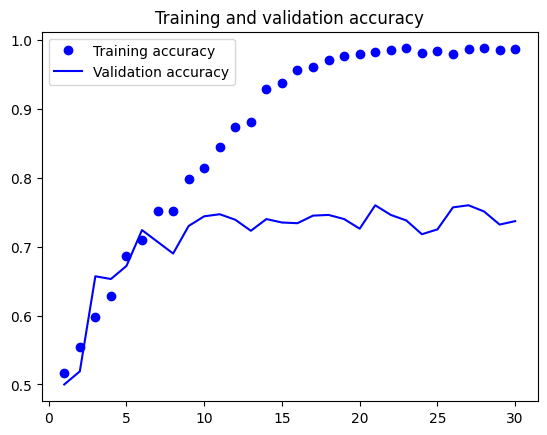

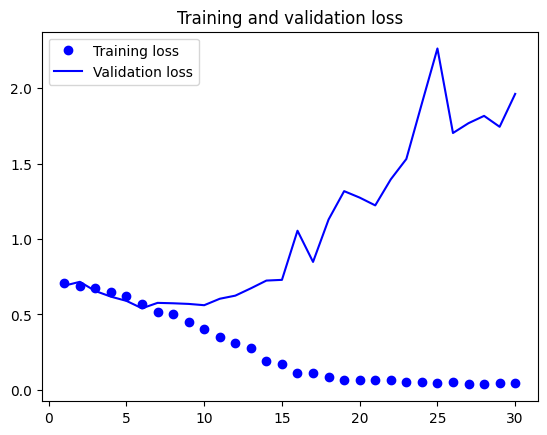

In [17]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [18]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.7181 - loss: 0.5668
Test accuracy: 0.724


### Using data augmentation

**Define a data augmentation stage to add to an image model**

In [19]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

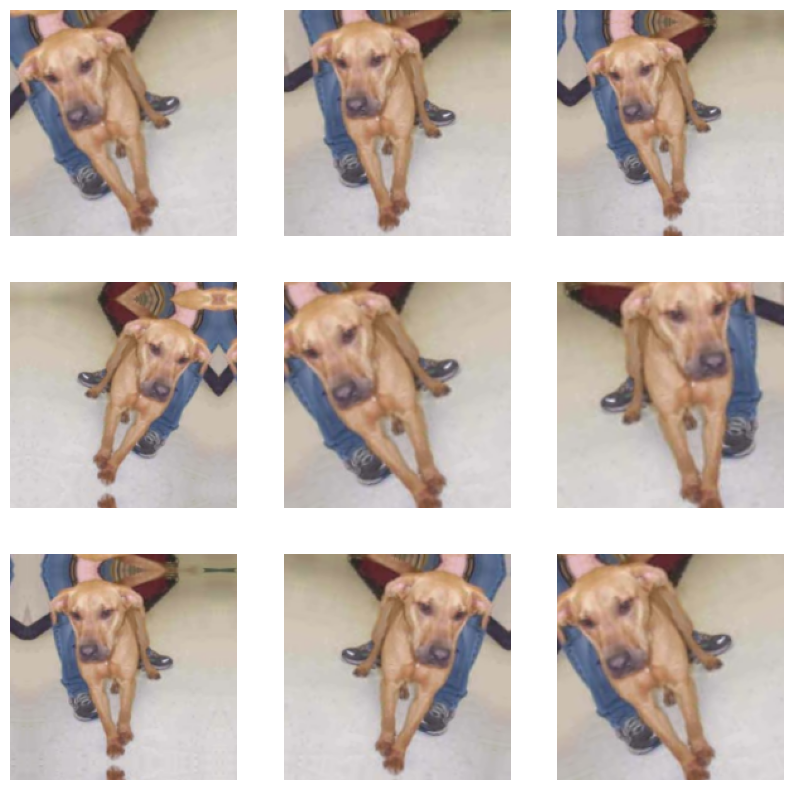

In [20]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [21]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

THE NEXT TRAINING SESSION, AGAIN BE PATIENT...

In [22]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step - accuracy: 0.5326 - loss: 0.7318 - val_accuracy: 0.5000 - val_loss: 0.6921
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.5227 - loss: 0.7001 - val_accuracy: 0.5030 - val_loss: 0.6900
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.5441 - loss: 0.6899 - val_accuracy: 0.5980 - val_loss: 0.6630
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.5932 - loss: 0.6670 - val_accuracy: 0.6240 - val_loss: 0.6519
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.6329 - loss: 0.6570 - val_accuracy: 0.5770 - val_loss: 0.7311
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.6115 - loss: 0.6484 - val_accuracy: 0.6240 - val_loss: 0.6533
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.6407 - loss: 0.6407 - val_accuracy: 0.6400 - val_loss: 0.6278
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.6509 - loss: 0.6232 - val_accuracy: 0.

**Evaluating the model on the test set**

**Note:** This model will actually get saved in the files window!! You can download and reuse/train/tune them!

In [23]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8099 - loss: 0.5043
Test accuracy: 0.821


#### TESTING INDIVIDUAL IMAGES

Ok, I added this! We actually want to see how this works on individual images or it's no fun at.

Remember, that we trained this on 2500 of each cat or dog. So we have **500 images leftover for each** (2500-3000) that we can test.

If you want to test dogs just change "cat" to "dog" in the file name.

**Score:** Note the standard way to score binary classification is using the sigmoid function, it will getsa positive of > 0.5 (50%) for one category, in this case dogs. So, the cats will hover very close to 50/50.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
This image is 49.71% cat and 50.29% dog.


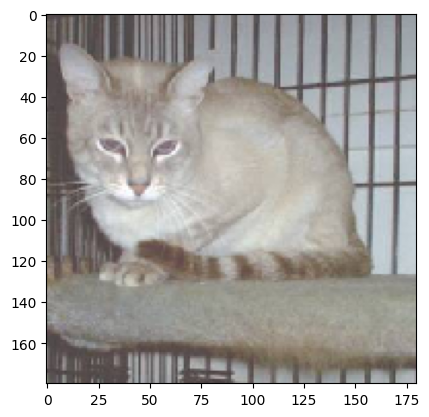

In [47]:
img = keras.utils.load_img("train_small/cat.2700.jpg", target_size=(180,180))
plt.imshow(img)

img_array = keras.utils.img_to_array(img)
img_array = keras.ops.expand_dims(img_array, 0)  # Create batch axis

predictions = test_model.predict(img_array)
score = float(keras.ops.sigmoid(predictions[0][0]))
print(f"This image is {100 * (1 - score):.2f}% cat and {100 * score:.2f}% dog.")
#with the sigmoid function this close to 50 means very accurate prediction of cats but not 100%

## Leveraging a pretrained model

### Feature extraction with a pretrained model

**Instantiating the VGG16 convolutional base**

Here we are downloading a preexisting model!

In [48]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet", #taking the weights from the imagenet training
    include_top=False, #not including the densely contected classifier on top of the network
    input_shape=(180, 180, 3)) #setting the image sizes we will be inputting / don't need this, but helps for the summary below

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [49]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 180, 180, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 90, 90, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 90, 90, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 45, 45, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 22, 22, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 5, 5, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

#### Fast feature extraction without data augmentation

**Extracting the VGG16 features and corresponding labels**

In [50]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━

In [51]:
train_features.shape

(2000, 5, 5, 512)

**Defining and training the densely connected classifier**

This will go faster because it's only training a few layers.

In [52]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.8616 - loss: 37.5946 - val_accuracy: 0.9710 - val_loss: 3.7423
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9771 - loss: 2.3523 - val_accuracy: 0.9660 - val_loss: 6.2127
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9855 - loss: 1.8725 - val_accuracy: 0.9660 - val_loss: 5.3859
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9893 - loss: 0.9027 - val_accuracy: 0.9630 - val_loss: 7.1408
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9901 - loss: 0.7692 - val_accuracy: 0.9640 - val_loss: 8.4027
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9963 - loss: 0.4050 - val_accuracy: 0.9670 - val_loss: 7.4446
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9961 - loss: 0.3081 - val_accuracy: 0.9280 - val_loss: 17.9140
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9860 - loss: 1.8641 - val_accuracy: 0.9710 - val_lo

**Plotting the results**

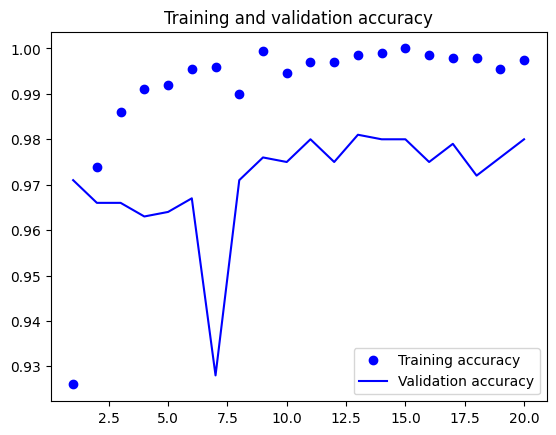

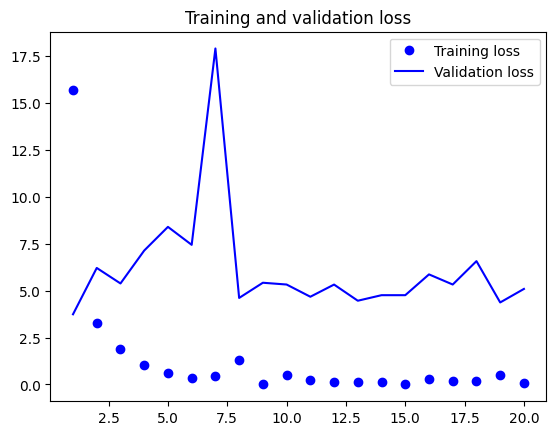

In [53]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [57]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [58]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [59]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [60]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

Training the model

In [61]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 203ms/step - accuracy: 0.8335 - loss: 39.9310 - val_accuracy: 0.9670 - val_loss: 3.6232
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - accuracy: 0.9438 - loss: 7.1664 - val_accuracy: 0.9660 - val_loss: 3.9220
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 164ms/step - accuracy: 0.9528 - loss: 6.3207 - val_accuracy: 0.9810 - val_loss: 2.3354
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - accuracy: 0.9593 - loss: 4.6398 - val_accuracy: 0.9740 - val_loss: 4.1508
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/step - accuracy: 0.9705 - loss: 3.7590 - val_accuracy: 0.9760 - val_loss: 3.7516
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - accuracy: 0.9685 - loss: 3.4669 - val_accuracy: 0.9740 - val_loss: 3.7768
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 189ms/step - accuracy: 0.9674 - loss: 2.9234 - val_accuracy: 0.9780 - val_loss: 2.4180
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 158ms/step - accuracy: 0.9693 - loss: 2.8087 - val_acc

**Evaluating the model on the test set**

In [62]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - accuracy: 0.9819 - loss: 2.1044
Test accuracy: 0.979


Again, let's try this on **individual images!**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
This image is 50.00% cat and 50.00% dog.


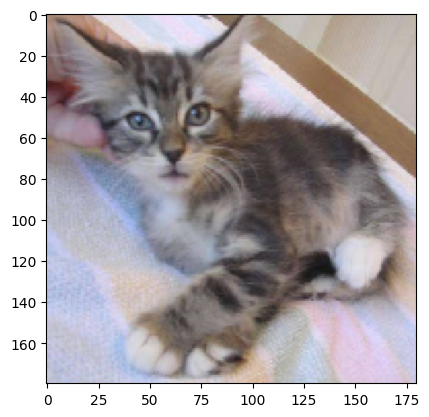

In [83]:
img = keras.utils.load_img("train_less/cat.2619.jpg", target_size=(180,180))
plt.imshow(img)

img_array = keras.utils.img_to_array(img)
img_array = keras.ops.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = float(keras.ops.sigmoid(predictions[0][0]))
print(f"This image is {100 * (1 - score):.2f}% cat and {100 * score:.2f}% dog.")

### Fine-tuning a pretrained model

Feel free to stop here!!! (In my instance this actually made the model ever so slightly less acurrate). But it's good to know you can do this.

In [84]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

**Freezing all layers until the fourth from the last**

In [85]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Fine-tuning the model**

In [86]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 220ms/step - accuracy: 0.9899 - loss: 0.7165 - val_accuracy: 0.9820 - val_loss: 1.6162
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 180ms/step - accuracy: 0.9889 - loss: 0.2971 - val_accuracy: 0.9820 - val_loss: 1.5992
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 171ms/step - accuracy: 0.9921 - loss: 0.1819 - val_accuracy: 0.9750 - val_loss: 2.1238
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 202ms/step - accuracy: 0.9922 - loss: 0.1254 - val_accuracy: 0.9790 - val_loss: 1.7466
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - accuracy: 0.9928 - loss: 0.1239 - val_accuracy: 0.9750 - val_loss: 1.8352
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 173ms/step - accuracy: 0.9879 - loss: 0.4953 - val_accuracy: 0.9810 - val_loss: 1.7741
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 174ms/step - accuracy: 0.9975 - loss: 0.0648 - val_accuracy: 0.9760 - val_loss: 2.1447
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 183ms/step - accuracy: 0.9913 - loss: 0.2221 - val_accu

In [87]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - accuracy: 0.9808 - loss: 1.0349
Test accuracy: 0.978


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
This image is 50.00% cat and 50.00% dog.


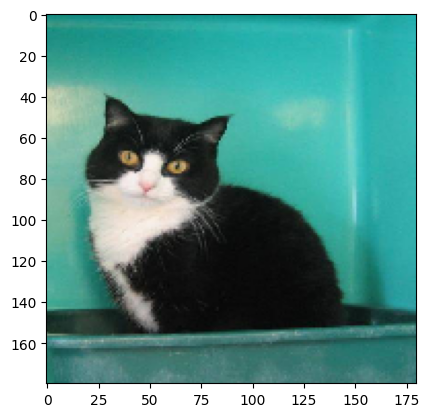

In [91]:
img = keras.utils.load_img("train_less/cat.2679.jpg", target_size=(180,180))
plt.imshow(img)

img_array = keras.utils.img_to_array(img)
img_array = keras.ops.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = float(keras.ops.sigmoid(predictions[0][0]))
print(f"This image is {100 * (1 - score):.2f}% cat and {100 * score:.2f}% dog.")